<a href="https://colab.research.google.com/github/QuickLearner171998/reaction_prediction_seq2seq/blob/working/run_commands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

In [0]:
% cd "/gdrive/My Drive/00_MY Projects and courses/reaction_prediction_seq2seq"

# Necessary installations
These might vary depending on the platform.
For this project I have used Colab



In [0]:
# ! pip uninstall tensorflow
# ! pip install tensorflow==1.15

In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')


In [0]:
# unittest
#!pip install -e .
!python -m unittest seq2seq.test.pipeline_test


In [0]:
# ! pip install ipykernel

# Inferencing

In [0]:
! chmod +x google_seq2seq_infer_jul_5_2017_1_beam_3.sh
! ./google_seq2seq_infer_jul_5_2017_1_beam_3.sh

In [0]:
!ls

# Post Processing

Proces the files so that they each line represent contains proper SMILES text. 
We then use rdkit to visualise the molecules

In [0]:
# Modify all text files to convert to molecule
file_names = ["processed_data/test_sources", "processed_data/test_targets","predictions/predictions_44000_steps_beam_3_test.txt"]
save_names = ["processed_test_sources.txt","processed_test_targets.txt", "processed_predictions_44000_steps_beam_3_test.txt"]
#remove_tags = ["<RX_{}>".format(i) for i in range(10)]
size_file = 0
for file_name, save_name in zip(file_names, save_names):
  with open(file_name, 'r') as f:
      lines = f.readlines()
  # lines = [line.replace(' ', '') for line in lines]
  size_file = len(lines)
  n_lines =[]
  for line in lines:
    # to remove reaction tags from source and targets
    # tags can be of len 6 or 7
    if(line[0]=='<'):
      line = line[6:]
    if(line[0]=='>'):
      line = line[1:]
    #remove spaces in between
    line = line.replace(' ', '')
    #line = line.replace('\n', '')
    n_lines.append(line)

  # finally, write lines in the file
  with open(save_name, 'w') as f:
      f.writelines(n_lines)

In [0]:
size_file

5004

## Visualize the molecules and reaction


In [0]:
from rdkit import Chem
from rdkit.Chem import Draw
import random 
size = (320, 320)  # Smaller figures than the default


In [0]:
rxn_no = random.randint(0, size_file) 
rxn_no

333

Source molecule i.e PRODUCT for Rxn no. 333


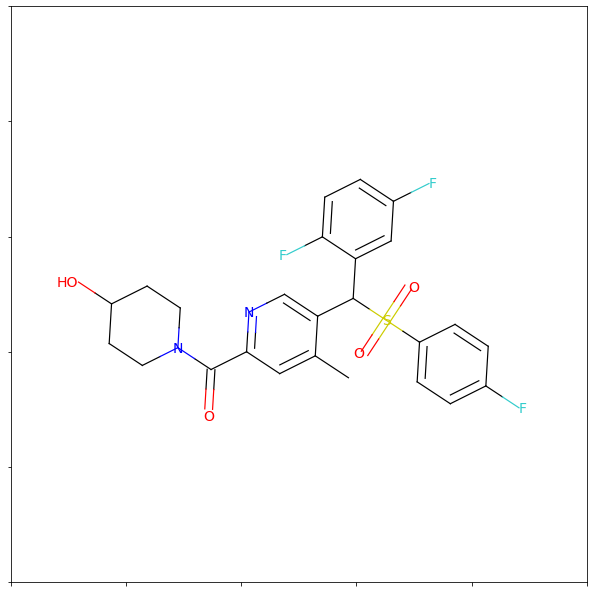

In [0]:
# visualize source tokens
print("Source molecule i.e PRODUCT for Rxn no.", rxn_no)
with open("processed_test_sources.txt") as f:
  lines = f.readlines()
line = lines[rxn_no]
if("\n") in line:
  line = line.split()
m = Chem.MolFromSmiles(line[0])
fig = Draw.MolToMPL(m, size=size)


Target molecule or THE REACTANTS for Rxn no. 333


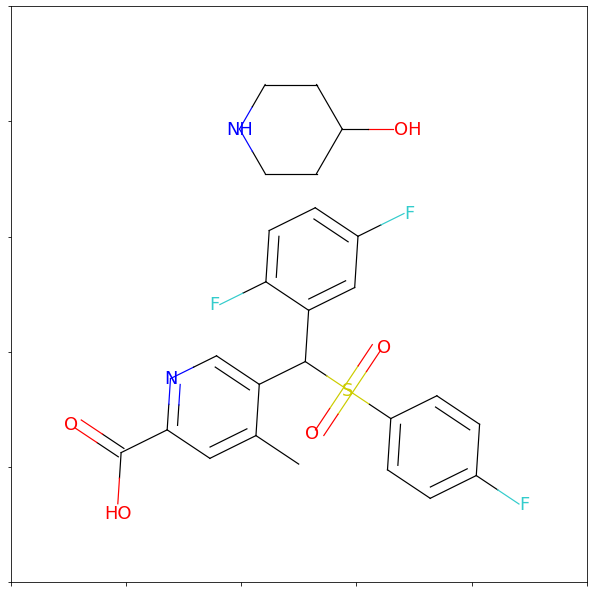

In [0]:
# visualize source tokens
print("Target molecule or THE REACTANTS for Rxn no.", rxn_no)
with open("processed_test_targets.txt") as f:
  lines = f.readlines()
line = lines[rxn_no]
if("\n") in line:
  line = line.split()
m = Chem.MolFromSmiles(line[0])
fig = Draw.MolToMPL(m, size=size)


Predicted Reactants for Rxn no. 333


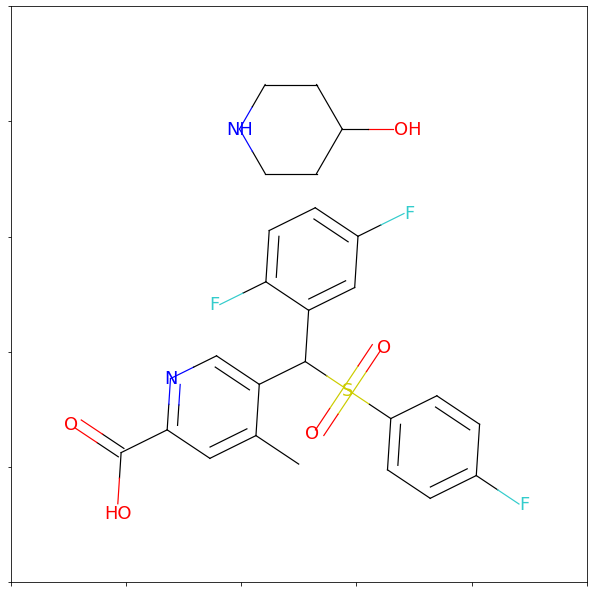

In [0]:
# visualize source tokens
print("Predicted Reactants for Rxn no.", rxn_no)
with open("processed_predictions_44000_steps_beam_3_test.txt") as f:
  lines = f.readlines()
line = lines[rxn_no]
if("\n") in line:
  line = line.split()
m = Chem.MolFromSmiles(line[0])
fig = Draw.MolToMPL(m, size=size)
